In [1]:
import pandas as pd
import csv
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle


In [2]:
data = pd.read_csv('track_rate.csv', header = 0, dtype={'userID':'str','itemID':'str','label':'str'})

/Users/yuweitu/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data = data[data['rating'] != 'rating']

In [4]:
data['rating'] = data['rating'].astype('int')

In [5]:
trainningNum = math.floor(27168056 * 0.8)
trainning = data[:trainningNum]
testing = data[trainningNum:]

In [6]:
ave = data.groupby(data['itemID']).mean()
ave.columns = ['average rating']

In [7]:
dataWithAverage = data.join(ave, on = 'itemID')
testingWithAverage = testing.join(ave, on = 'itemID')

In [8]:
mean_squared_error(testingWithAverage['rating'], testingWithAverage['average rating'])

1223.3557760465712

In [9]:
for index, row in testingWithAverage.iterrows():
    score = row['rating']
    if score >= 80:
        testingWithAverage.set_value(index, 'rating', 4)
    if score < 20:
        testingWithAverage.set_value(index, 'rating', 0)
    if score >= 20 and score < 40:
        testingWithAverage.set_value(index, 'rating', 1)
    if score >= 40 and score < 60:
        testingWithAverage.set_value(index, 'rating', 2)
    if score >= 60 and score < 80:
        testingWithAverage.set_value(index, 'rating', 3) 

In [10]:
for index, row in testingWithAverage.iterrows():
    score = row['average rating']
    if score >= 80:
        testingWithAverage.set_value(index, 'average rating', 4)
    if score < 20:
        testingWithAverage.set_value(index, 'average rating', 0)
    if score >= 20 and score < 40:
        testingWithAverage.set_value(index, 'average rating', 1)
    if score >= 40 and score < 60:
        testingWithAverage.set_value(index, 'average rating', 2)
    if score >= 60 and score < 80:
        testingWithAverage.set_value(index, 'average rating', 3)

In [11]:
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test = testingWithAverage['rating']
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_score = testingWithAverage['average rating']
y_score = label_binarize(y_score, classes=[0, 1, 2, 3, 4])
n_classes = y_score.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


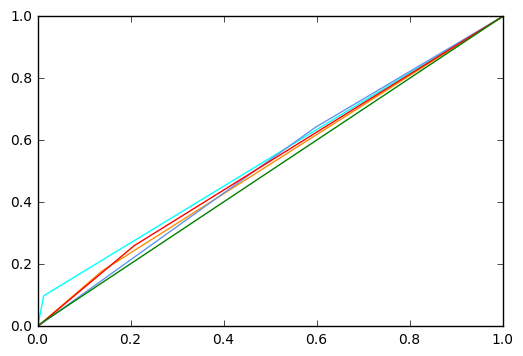

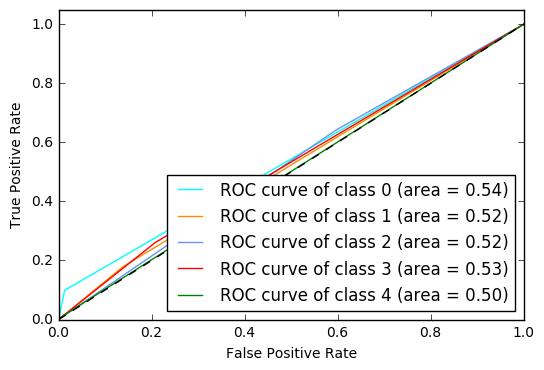

In [14]:
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'r', 'g'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()